# ค้นหาจำนวนสถานีฝนในบัพเฟอร์240kmเรดาร์พิษณุโลก
### ต้องมีความรู้พื้นฐาน pandas ก่อน สามารถเรียนด้วยตนเองได้จากลิงก์ตัวอย่างต่อไปนี้ 
* บล็อกภาษาไทย https://blog.datath.com/cheatsheet-pandas/
* ยูทูป อ.ประเสริฐ https://www.youtube.com/playlist?list=PLoTScYm9O0GGsOHPCeufxCLt-uGU5Rsuj
* เวปทางการของ pandas มีติวเตอร์เรียลให้เยอะมาก https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

### ต้องเรียน geopandas
* ยูทูป อ.ประเสริฐ https://www.youtube.com/playlist?list=PLoTScYm9O0GG6YQp8rpYK4DVkalW_eo_p
* เวปบล๊อกตัวอย่างภาษาไทย https://medium.com/super-ai-engineer/%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5-spatial-data-%E0%B9%82%E0%B8%94%E0%B8%A2%E0%B9%83%E0%B8%8A%E0%B9%89-geopandas-part1-90be80866ea2
* ยูทูป อ.ยาง https://www.youtube.com/watch?v=Qju1z6a2Is4&list=PL2e-NEAjUyLGJz7c3Wa9rKajoArtgXO2I&index=12&t=14s
* เวปไซต์ทางการของ geopandas https://geopandas.org/en/v0.9.0/getting_started/introduction.html

In [1]:
'''
2024/01/09 
พัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค 
email:nattaponm@nu.ac.th 
ยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists 
หนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567
Github: https://github.com/nattaponm
Scopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600
'''

'\n2024/01/09 \nพัฒนาโค้ดโดย รศ.ดร.นัฐพล มหาวิค \nemail:nattaponm@nu.ac.th \nยูทูป:https://www.youtube.com/@Nattapon_Mahavik/playlists \nหนังสือ: เรดาร์ตรวจอากาศทางอุตุนิยมวิทยา https://www.chulabook.com/education/144567\nGithub: https://github.com/nattaponm\nScopus: https://www.scopus.com/authid/detail.uri?authorId=55583236600\n'

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import fiona #ใช้เพื่อส่งออกไฟล์
from matplotlib_scalebar.scalebar import ScaleBar

## อ่านตำแหน่งสถานีวัดน้ำฝนภาคพื้นดิน สสน. 

In [3]:
df = pd.read_csv('../1data/station_metadata_haii_geographic.csv')
df.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R


## แปลงตำแหน่งสถานีวัดน้ำให้เป็น geopandas dataframe

In [4]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df_st = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
geo_df_st.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R,POINT (99.98093 14.00326)
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R,POINT (102.18023 13.50109)
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R,POINT (102.57484 13.62765)
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R,POINT (102.63007 12.44471)
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R,POINT (98.79847 18.60389)


## อ่านขอบเขตลุ่มน้ำ แสดงแผนที่

In [6]:
basin_map = gpd.read_file('../1data/1shape_gis/1basin_th/MainBasin_ONWR_Law_WGS84.shp', encoding="TIS-620")
basin_map.head()

,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM,geometry
0,01,สาละวิน,Salawin,19101.550019,"MULTIPOLYGON (((427015.307 2117880.732, 427015..."
1,02,โขงเหนือ,North Khong,17432.583752,"POLYGON ((492274.691 2185816.923, 492298.497 2..."
2,03,โขงตะวันออกเฉียงเหนือ,Northeast Khong,47165.078898,"MULTIPOLYGON (((1202723.451 1695889.957, 12026..."
3,04,ชี,Chi,49269.589431,"POLYGON ((1066959.970 1808982.947, 1066925.717..."
4,05,มูล,Mun,70947.717673,"POLYGON ((1199462.673 1703888.438, 1199449.364..."


<AxesSubplot: >

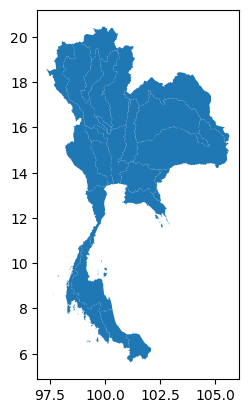

In [7]:
basin_map.to_crs(epsg=4326).plot()

## แสดงแผนที่ลุ่มน้ำ กับ ตำแหน่งสถานีวัดน้ำฝน

Text(0.5, 1.0, 'Kings County Real Estate')

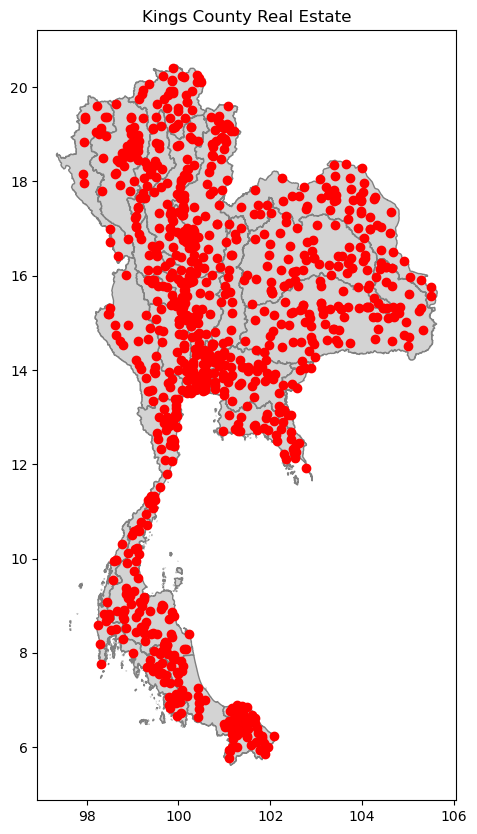

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax, color='red')
ax.set_title('Kings County Real Estate')

## แสดงแผนที่ลุ่มน้ำ กับ ตำแหน่งสถานีวัดน้ำฝน ตามความหนาแน่น

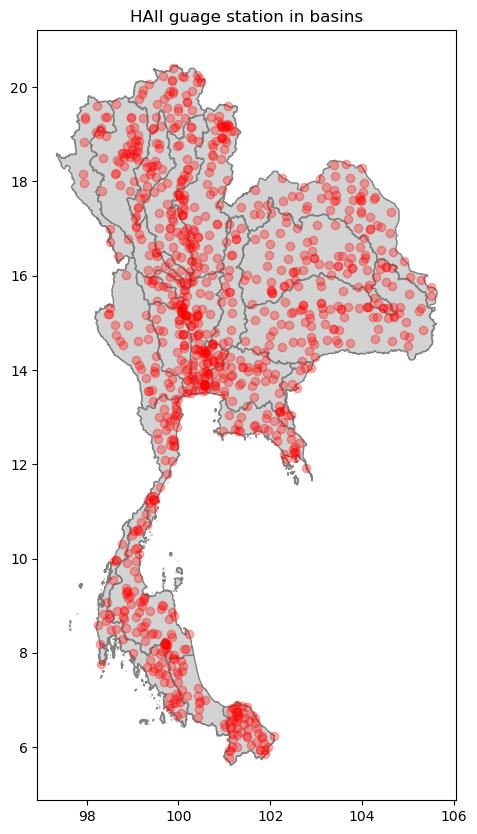

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.set_title('HAII guage station in basins')
plt.savefig('../2results/map_gauge_haii_basins.jpg')

## แผนที่แบบมี scale bar 
https://geopandas.org/en/stable/gallery/matplotlib_scalebar.html

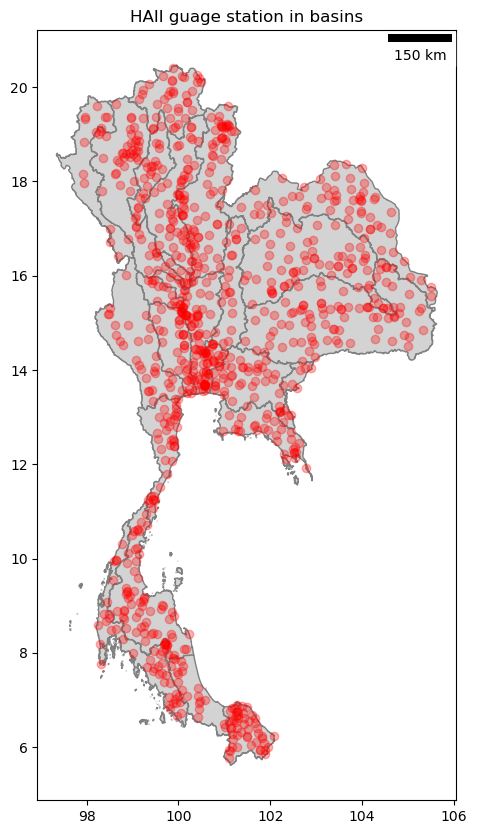

In [10]:
from shapely.geometry.point import Point

points = gpd.GeoSeries(
    [Point(100, 16), Point(101, 16)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32647)  # Projected WGS 84 - meters

distance_meters = points[0].distance(points[1])

fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.add_artist(ScaleBar(distance_meters))
ax.set_title('HAII guage station in basins')
plt.savefig('../2results/map_gauge_haii_basins.jpg')

# พลอตสถานีเรดาร์กับแผนที่ฐาน

In [11]:
df_rd = pd.DataFrame(
    {
        "City": ["Phitsanulok"],
        "Latitude": [16.775365],
        "Longitude": [100.217971],
    }
)

In [12]:
gdf_rd = gpd.GeoDataFrame(
    df_rd, geometry=gpd.points_from_xy(df_rd.Longitude, df_rd.Latitude), crs="EPSG:4326"
)

Text(0.5, 1.0, 'Radar station Basin in Thailand')

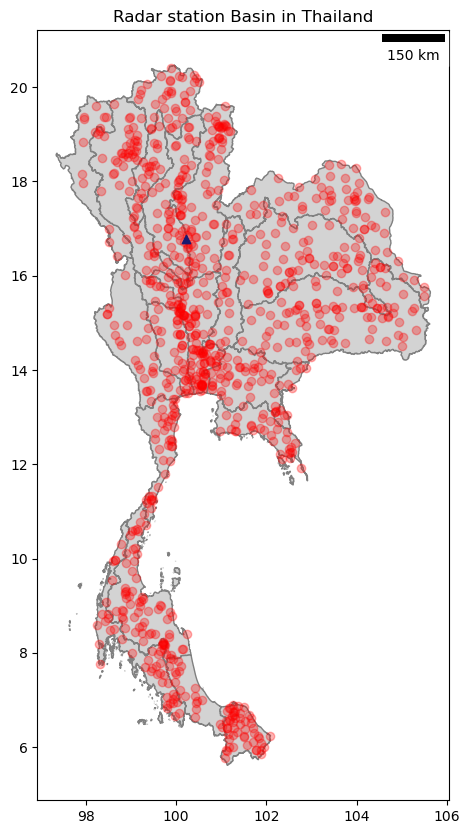

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.add_artist(ScaleBar(distance_meters))
gdf_rd.plot(ax=ax, marker='^',color='MidnightBlue')
ax.set_title('Radar station Basin in Thailand')

# แสดงบัฟเฟอร์ 240 km UTM 47N

In [14]:
buffer = gdf_rd.to_crs(epsg=32647).buffer(240000) # เมตร

Text(0.5, 1.0, 'Radar station Basin in Thailand')

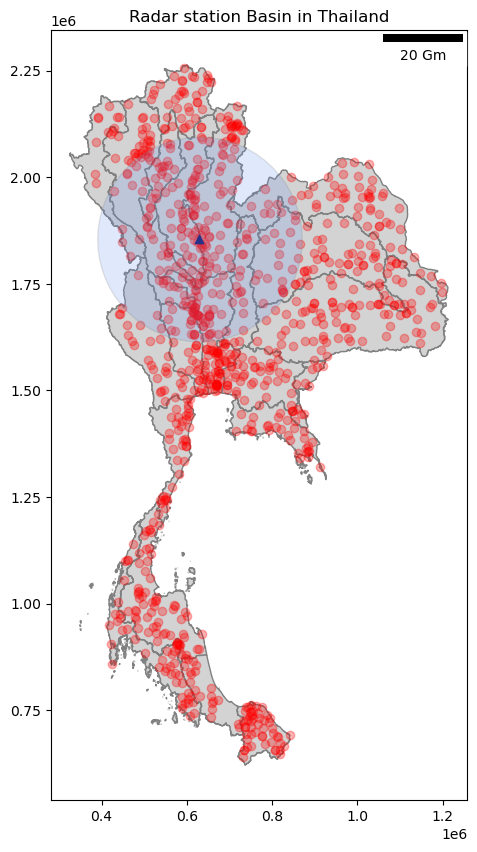

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=32647).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.to_crs(epsg=32647).plot(ax=ax,  color='red', alpha = .3 )
ax.add_artist(ScaleBar(distance_meters))
gdf_rd.to_crs(epsg=32647).plot(ax=ax, marker='^',color='MidnightBlue')
buffer.plot(ax=ax, color='CornflowerBlue',edgecolor='grey', linewidth=1, alpha=0.2)
ax.set_title('Radar station Basin in Thailand')

# ใช้ Spatial Joins เพื่อนับจำนวนสถานีวัดฝนในเรดาร์พิษณุโลก

In [16]:
# ใช้ Spatial Joins
geo_df_buffer = gpd.GeoDataFrame(geometry=buffer)
geo_df_GaugeInBuffer = gpd.sjoin(geo_df_st.to_crs(epsg=32647), geo_df_buffer, how="inner", op='intersects')

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [17]:
geo_df_GaugeInBuffer.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry,index_right
5,BDLH,ทต.ลานหอย,17.008568,99.582944,ลานหอย,บ้านด่านลานหอย,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,POINT (562048.519 1880595.205),0
21,BSMP,อบต.บึงสามพัน,15.778058,101.020883,บึงสามพัน,บึงสามพัน,เพชรบูรณ์,แม่น้ำป่าสัก,ภาคเหนือ,R,POINT (716493.042 1745424.059),0
23,KRMT,ทต.บ้านโตนด,16.833710,99.802720,โตนด,คีรีมาศ,สุโขทัย,แม่น้ำยม,ภาคเหนือ,R,POINT (585521.453 1861332.899),0
27,LNR1,อบต.ท่ามะนาว,15.199323,101.163878,ท่ามะนาว,ชัยบาดาล,ลพบุรี,แม่น้ำป่าสัก,ภาคกลาง,R,POINT (732464.184 1681523.500),0
28,SBT1,อบต.ชอนสารเดช,15.184949,100.681312,ชอนสารเดช,หนองม่วง,ลพบุรี,แม่น้ำเจ้าพระยา,ภาคกลาง,R,POINT (680619.815 1679476.616),0


Text(0.5, 1.0, 'Gauges in Phitsanulok Radar UTM47N')

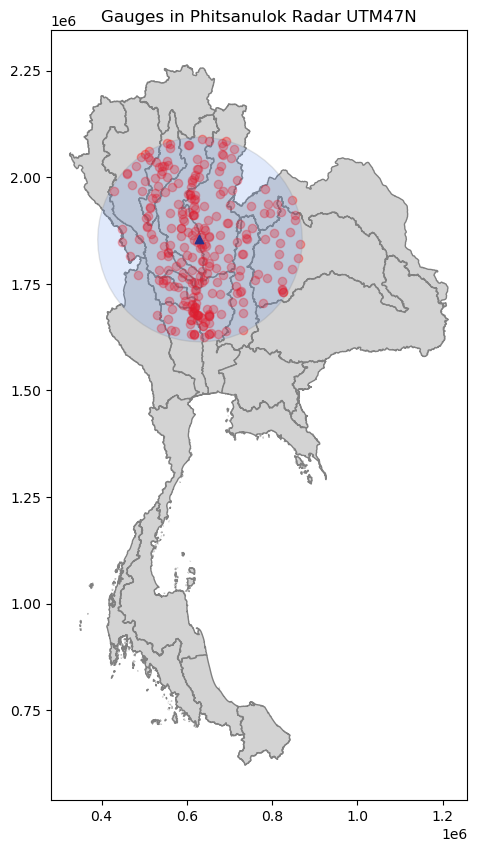

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=32647).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_GaugeInBuffer.to_crs(epsg=32647).plot(ax=ax,  color='red', alpha = .3 )
#ax.add_artist(ScaleBar(distance_meters))
gdf_rd.to_crs(epsg=32647).plot(ax=ax, marker='^',color='MidnightBlue')
buffer.plot(ax=ax, color='CornflowerBlue',edgecolor='grey', linewidth=1, alpha=0.2)
ax.set_title('Gauges in Phitsanulok Radar UTM47N')

# เซฟไฟล์สถานีในเรดาร์พิษณุโลกออกไปเป็น shape 

In [19]:
# เซฟไฟล์สถานีในเรดาร์พิษณุโลกออกไปเป็น shape / csv
geo_df_GaugeInBuffer.to_file('../2results/GaugeInBuffer_radar_phitsanulok.shp', encoding="TIS-620")  
geo_df_GaugeInBuffer.to_csv('../2results/GaugeInBuffer_radar_phitsanulok.csv', encoding="TIS-620")  

C:\Users\Admin\AppData\Local\Temp\ipykernel_31684\75837660.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df_GaugeInBuffer.to_file('../2results/GaugeInBuffer_radar_phitsanulok.shp', encoding="TIS-620")


# ทดสอบแสดงบัฟเฟอร์ 240 km WGS84

In [20]:
buffer_wgs84 = gdf_rd.to_crs(epsg=4326).buffer(2.4) #degree

C:\Users\Admin\AppData\Local\Temp\ipykernel_31684\214201895.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_wgs84 = gdf_rd.to_crs(epsg=4326).buffer(2.4) #degree


Text(0.5, 1.0, 'Radar station Basin in Thailand')

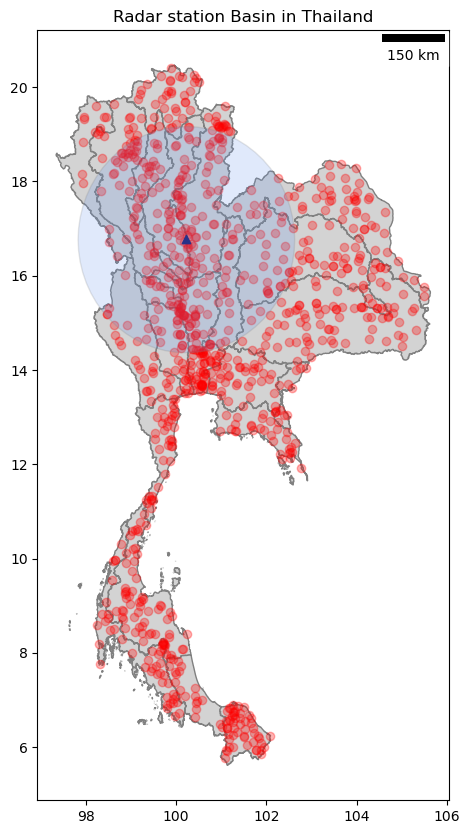

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.add_artist(ScaleBar(distance_meters))
gdf_rd.plot(ax=ax, marker='^',color='MidnightBlue')
buffer_wgs84.plot(ax=ax, color='CornflowerBlue',edgecolor='grey', linewidth=1, alpha=0.2)
ax.set_title('Radar station Basin in Thailand')